In [15]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
print 'sklearn version = {}'.format(sklearn.__version__)

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sklearn version = 0.18


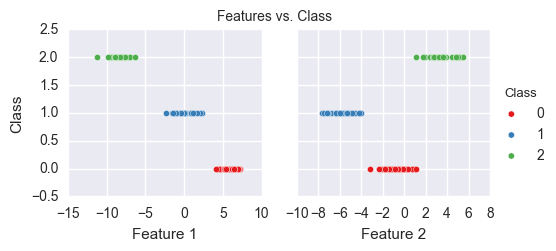

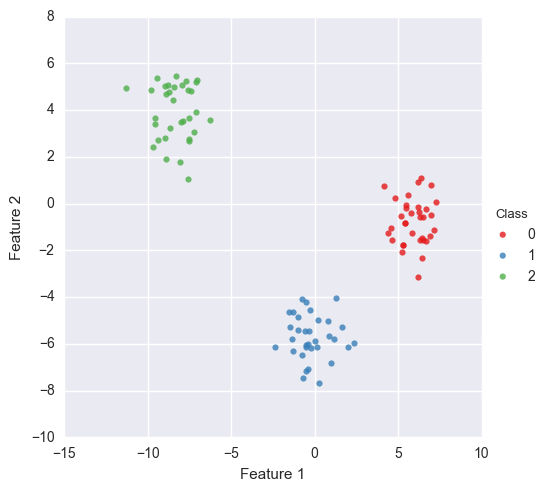

In [41]:
# ----------
# Generate sample dataset for clustering
# ----------

X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=15112016)

X_train = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1]
    }).round(2)

X_plot = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    })


g = sns.pairplot(X_plot, x_vars=['Feature 1', 'Feature 2'], y_vars='Class', 
                 hue='Class', palette='Set1')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Features vs. Class')

sns.lmplot(x='Feature 1', y='Feature 2', data=X_plot, hue='Class', palette='Set1', fit_reg=False)

array([[-0.18939394, -5.71878788],
       [-8.34939394,  3.93242424],
       [ 5.90794118, -0.76      ]])

(-15, 10)

(-10, 8)

(-15, 10)

(-10, 8)

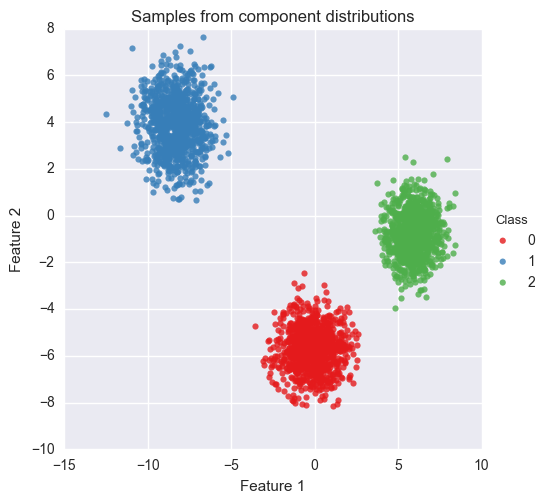

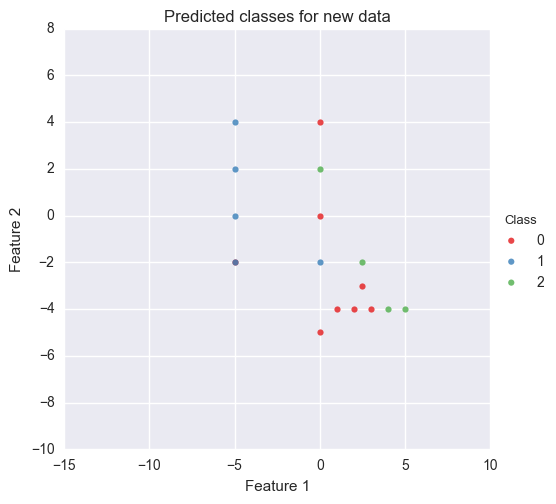

In [102]:

clf = GaussianMixture(n_components=3, covariance_type='full')
clf = clf.fit(X_train)

clf.means_
pred_classes = clf.predict([
        [0,-5],
        [5,-4],
        [2.5,-3],
        [2.5,-2],
        [0,-2],
        [0,0],
        [0,2],
        [0,4],
        [-5,0],
        [-5,2],
        [-5,4],
        [-5,-2],
        [-5,-4],
        [1,-4],
        [2,-4],
        [3,-4],
        [4,-4],
    ])
df2 = pd.DataFrame({
        'Feature 1': [0,5,2.5,2.5,0,0,0,0,-5,-5,-5,-5,-5,1,2,3,4],
        'Feature 2': [-5,-4,-3,-2,4,0,2,-2,0,2,4,-2,-2,-4,-4,-4,-4],
        'Class': pred_classes
    })

samples = clf.sample(3000)
df = pd.DataFrame({
        'Feature 1': samples[0][:,0],
        'Feature 2': samples[0][:,1],
        'Class': samples[1]
    })

g = sns.lmplot('Feature 1', 'Feature 2', data=df, hue='Class', palette='Set1', fit_reg=False)
g.axes[0,0].set_xlim(-15,10)
g.axes[0,0].set_ylim(-10,8)
plt.title('Samples from component distributions')

g = sns.lmplot('Feature 1', 'Feature 2', data=df2, hue='Class', palette='Set1', fit_reg=False)
g.axes[0,0].set_xlim(-15,10)
g.axes[0,0].set_ylim(-10,8)
plt.title('Predicted classes for new data')


for attr in dir(clf):
    if attr.startswith('_'): continue
    if not attr.endswith('_'): continue
    # print '{} \n{} \n'.format(attr, getattr(clf, attr))
